# Основы программирования в Python

*Алла Тамбовцева, НИУ ВШЭ*

*Данный ноутбук основан на [лекции](http://nbviewer.math-hse.info/github/ischurov/pythonhse/blob/master/Lecture%2012.ipynb) Щурова И.В. по [курсу](http://math-info.hse.ru/2015-16/%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B5_Python_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B1%D0%BE%D1%80%D0%B0_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85) «Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2015-16).*

## Работа с таблицами. Введение в библиотеку pandas

### Датафреймы (таблицы) в pandas

В этой и последующих лекциях мы будем работать с таблицами. В социальных науках термины *база данных* и *таблица* часто используются как синонимы. Вообще, между этими терминами есть существенная разница, так как база данных по сути ‒ это набор таблиц, связанных друг с другом (можно думать о ней как о файле Excel с разными листами). Но давайте для простоты считать эти термины эквивалентными, основы работы с «настоящими» базами данных (*SQL*, *PyMongo*) мы обсуждать не будем. Кроме того, в качестве синонима слова *таблица* мы будем использовать слово *датафрейм* как кальку с термина *data frame*.

Таблицы можно получить из стандартных структур данных в Python. Например, мы можем создать таблицу в таком виде:

In [1]:
table = [[1, 2, 3], [4, 5, 6]]

In [2]:
table 

[[1, 2, 3], [4, 5, 6]]

Пока `table` ‒ обычный список списков. Можно считать, что списки внутри `table` образуют строки таблицы. Обратимся к первой строке ‒ списку с индексом 0:

In [3]:
table[0]

[1, 2, 3]

А теперь запросим первый элемент первого списка:

In [4]:
table[0][0] # двойной индекс

1

Работать с таблицей в таком виде неудобно. Приходится использовать какие-то двойные индексы, да выбор столбца ‒ не совсем тривиальная задача. Чтобы не мучиться, давайте превратим `table` в датафрейм из библиотеки `pandas`. Эта библиотека используется для удобной и более эффективной работы с таблицами. Ее функционал достаточно разнообразен, но давайте начнем с каких-то базовых функций и методов. 

Для начала импортируем саму библиотеку.

In [5]:
import pandas as pd

Здесь мы использовали такой прием: импортировали библиотеку и присвоили ей сокращенное имя, которое будет использоваться в пределах данного ноутбука. Чтобы не писать перед каждой библиотечной функцией длинное `pandas.` и не импортировать сразу все функции из этой библиотеки, мы сократим название до `pd` и в дальнейшем Python будет понимать, что мы имеем в виду. Можно было бы сократить и до `p`, но тогда есть риск забыть про это и создать переменную с таким же именем, что плохо. К тому же `pd` ‒ распространенное и устоявшееся сокращение.

(И да, таким образом можно сокращать названия любых библиотек и модулей. Ничто бы не помешало нам на предыдущих занятиях писать, например, `import math as ma`, просто в этом не было необходимости).

А теперь вернемся к таблице ‒ превратим список списков в объект `DataFrame`:

In [6]:
pd.DataFrame(table) # выглядит посимпатичнее

,0,1,2
0,1,2,3
1,4,5,6


Сохраним результат в переменную `df`:

In [7]:
df = pd.DataFrame(table)

In [8]:
df

,0,1,2
0,1,2,3
1,4,5,6


Как можно заметить, по умолчанию Python создает датафрейм по строкам, то есть в качестве первой строки берет первый список, затем ‒ второй, и так далее. При желании это можно исправить ‒ транспонировать таблицу, то есть поменять местами строки и столбцы. Для этого существует метод `.transpose()`:

In [9]:
df.transpose()

,0,1
0,1,4
1,2,5
2,3,6


Другой нюанс: Python создал названия строк и столбцов по умолчанию ‒ просто пронумеровал их, начиная с нуля. Разумеется, это тоже можно настраивать, но давайте оставим это до более содержательного примера. А пока посмотрим, что из себя представляют столбцы нашего датафрема:

In [10]:
df[0] # столбец с индексом 1 - Series

0    1
1    4
Name: 0, dtype: int64

In [11]:
type(df[0])

pandas.core.series.Series

Столбец датафрейма `df` имеет особый тип *Series*. Внешне *Series* отличается от обычного списка значений, потому что, во-первых, при вызове столбца на экран выводятся не только сами элементы, но их номер (номер строки), а во-вторых, на экран выводится строка с названием столбца (`Name: 0`) и его тип (`dtype: int64`, целочисленный). Первая особенность роднит *Series* со словарями: он представляет собой пары *ключ-значение*, то есть *номер-значение*. Вторая особенность роднит *Series* с массивами `numpy`: элементы обычно должны быть одного типа.

Библиотеку `numpy` мы еще не обсуждали, но обязательно обсудим позже, так как во многих задачах использовать массивы `numpy` гораздо удобнее, чем списки. 

### Загрузка таблицы из файла и описание переменных

А теперь давайте загрузим какую-нибудь реальную базу данных из файла. Библиотека `pandas` достаточно гибкая, она позволяет загружать данные из файлов разных форматов. Пока остановимся на самом простом ‒ файле *csv*, что расшифровывается как *comma separated values*. Столбцы в таком файле по умолчанию отделяются друг от друга запятой. Например, такая таблица

In [12]:
pd.DataFrame([[1, 4, 9], [4, 8, 6]])

,0,1,2
0,1,4,9
1,4,8,6


сохраненная в формате *csv* без названий строк и столбцов будет выглядеть так:

Но разделитель столбцов в таблице может быть и другим, например, точкой с запятой:

В таких случаях нам потребуется дополнительно выставлять параметр `sep = ";"`, чтобы Python понимал, как правильно отделять один столбец от другого. Но потренируемся открывать разные форматы файлов в следующий раз. Сейчас посмотрим, как загрузить файл с компьютера.

По умолчанию Python видит только те файлы, которые хранятся в текущей рабочей папке ‒ папке, откуда запускается Python или, в нашем случае, Jupyter Notebook. Чтобы узнать, какая папка является рабочей, необходимо загрузить модуль `os` и вызвать функцию `getcwd()`:

In [13]:
import os

In [14]:
os.getcwd() # от get current working directory

'/home/oem/Рабочий стол'

Эта функция возвращает путь к рабочей папке. В моем случае это `'/home/oem/Рабочий стол`, на компьютере с Windows в классе ‒ `C:\\Users\\student`. Python подсказывает, что в моем случае рабочей папкой является *Рабочий стол*, который лежит в папке *oem*, в *home*. Обратите внимание: в Mac OS и Linux слэши между названиями папок прямые и одинарные, в Windows ‒ обратные и двойные. Плюс, в Windows всегда в начале прописывается диск (`C:` или иные).

Иногда удобно положить файл, с которым мы будем работать, в рабочую папку. Можно явно переместить файл из папки в папку, но при работе в Jupyter можно сделать проще ‒ воспользоваться кнопкой *Upload* на странице *Home*. Кто пользуется командной строкой, есть альтернатива: запустить сам Jupyter Notebook из той папки, где хранятся файлы для работы.

А так можно изменить рабочую папку, прописав новый путь:

In [16]:
os.chdir("/home/oem/Рабочий стол")

Теперь перейдем к загрузке самого файла. Воспользуемся функцией `read_csv()`. 

*Для тех, кто чаще работает в R:* следите за написанием этой функции, есть соблазн написать `read.csv()`.

In [17]:
df = pd.read_csv("scores2.csv")

В файле `scores2.csv` сохранены оценки студентов-политологов по ряду курсов. Оценки реальные, взяты из кумулятивного рейтинга, но имена студентов зашифрованы ‒ вместо них задействованы номера студенческих билетов. Посмотрим на базу данных:

In [18]:
df

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
5,М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
6,М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
7,М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
8,М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1
9,М141БПЛТЛ078,6,6,9,5,6,10,7,6.0,8,6,9,6.0,8,8.0,6,7,0


Так как в нашем случае таблица не очень большая, Python вывел ее на экран полностью. Если строк или столбцов было бы слишком много, Python вывел бы несколько первых и последних, а в середине бы поставил многоточие.

Кроме того, можно вывести первые или последние строки таблицы, используя методы `.head()` и `.tail()`.

In [19]:
df.head()

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [20]:
df.tail()

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
55,М141БПЛТЛ043,5,5,6,5,8,5,6,5.0,6,4,5,4.0,5,NaN,4,6,0
56,М141БПЛТЛ084,6,7,8,4,8,5,5,NaN,8,4,4,4.0,4,4.0,6,7,1
57,М141БПЛТЛ005,5,7,5,5,7,4,7,4.0,5,4,5,5.0,4,4.0,4,8,1
58,М141БПЛТЛ044,4,5,7,4,6,4,4,5.0,4,4,4,4.0,6,NaN,5,5,1
59,13051038,5,4,4,4,9,5,5,5.0,5,4,4,NaN,7,4.0,4,4,1


**Внимание:** это просто первые и последние строки таблицы «как есть». Никакой сортировки не происходит! 

По умолчанию эти методы выводят пять строк, но при желании это легко изменить. Достаточно в скобках указать желаемое число строк.

In [21]:
df.head(10) # первые 10 строк

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
5,М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
6,М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
7,М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
8,М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1
9,М141БПЛТЛ078,6,6,9,5,6,10,7,6.0,8,6,9,6.0,8,8.0,6,7,0


**Описание показателей (переменных):**
    
* id ‒ номер студенческого билета
* catps	‒ оценка по курсу *Категории политической науки*
* mstat	‒ оценка по курсу *Математика и статистика*
* soc ‒	оценка по курсу *Социология*
* econ	‒ оценка по курсу *Экономика*
* eng	‒ оценка по курсу *Английский язык*
* polth	‒ оценка по курсу *История политических учений*
* mstat2	‒ оценка по курсу *Математика и статистика (часть 2)*
* phist	‒ оценка по курсу *Политическая история*
* law	‒ оценка по курсу *Право*
* phil	‒ оценка по курсу *Философия*
* polsoc	‒ оценка по курсу *Политическая социология*
* ptheo	‒ оценка по курсу *Политическая теория*
* preg	‒ оценка по курсу *Политическая регионалистика*
* compp	‒ оценка по курсу *Сравнительная политика*
* game	‒ оценка по курсу *Теория игр*
* wpol	‒ оценка по курсу *Мировая политика и международные отношения*
* male ‒ пол (1 ‒ мужской, 0 ‒ женский)

Давайте кое-что подкорректруем. Сделаем так, чтобы строки в таблице назывались в соответствии с `id`. Другими словами, сделаем так, чтобы первый столбец считался индексом строки:

In [22]:
df = pd.read_csv("scores2.csv", index_col = 0)

In [23]:
df # теперь так

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Иногда такой подход может быть полезен. Представьте, что все переменные в таблице, кроме *id*, измерены в количественной шкале, и мы планируем реализовать на них статистический метод, который работает исключительно с числовыми данными. Если мы просто выкинем столбец с *id*, мы потеряем информацию о наблюдении, если мы его оставим, нам придется собирать в отдельную таблицу показатели, к которым будем применять метод, так как сохраненный в исходной таблице текст будет мешать. Если же мы назовем строки в соответствии с *id*, мы убьем сразу двух зайцев: избавимся от столбца с текстом и не потеряем информацию о наблюдении (код, имя респондента, название страны и прочее).

Какую сводную информацию по таблице можно получить? Например, число переменных (столбцов) и наблюдений (строк), а также число заполненных значений. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 17 columns):
catps     60 non-null int64
mstat     60 non-null int64
soc       60 non-null int64
econ      60 non-null int64
eng       60 non-null int64
polth     60 non-null int64
mstat2    60 non-null int64
phist     59 non-null float64
law       60 non-null int64
phil      60 non-null int64
polsoc    60 non-null int64
ptheo     58 non-null float64
preg      60 non-null int64
compp     57 non-null float64
game      60 non-null int64
wpol      60 non-null int64
male      60 non-null int64
dtypes: float64(3), int64(14)
memory usage: 8.4+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `df` является объектом *DataFrame*. Во-вторых, он вывел число строк (`60 entries`) и показал их индексы (`М141БПЛТЛ024 to 13051038`). В-третьих, он вывел число столбцов (`total 17 columns`). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы `non-null` ‒ это всё, кроме пропущенных значений, которые кодируются особым образом (`NaN` ‒ от * **n**ot **a** **n**umber*). В нашей таблице почти все столбцы заполнены полностью: 60 ненулевых элементов из 60. Но есть столбцы с пропущенными значениями: *phist*, *ptheo*, *compp*.

Далее указан тип каждого столбца, целочисленный `int64` и с плавающей точкой`float64`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [25]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000,60.000000,58.000000,60.000000,57.000000,60.000000,60.000000,60.000000
mean,6.700000,7.466667,7.216667,6.116667,8.350000,6.600000,7.033333,5.830508,6.866667,5.966667,7.183333,5.603448,6.700000,5.631579,6.250000,7.566667,0.450000
std,1.417804,1.578099,1.208608,1.718214,0.971195,1.638519,1.707081,1.662492,1.213856,1.850027,1.589069,1.413465,1.356716,1.422166,1.781496,1.430499,0.501692
min,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.000000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,4.750000,6.000000,4.250000,6.000000,4.000000,5.000000,7.000000,0.000000
50%,7.000000,7.000000,7.000000,6.000000,8.000000,6.000000,7.000000,6.000000,7.000000,5.500000,7.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.250000,9.000000,8.000000,7.000000,9.000000,8.000000,8.000000,7.000000,8.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.250000,8.250000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


В случае количественных показателей этот метод возвращает таблицу с основными описательными статистиками: 

* count ‒ число непустых (заполненных) значений
* mean ‒ среднее арифметическое
* std ‒ стандартное отклонение (показатель разброса данных относительно среднего значения)
* min ‒ миниммальное значение
* max ‒ максимальное значение
* 25% ‒ нижний квартиль (значение, которое 25% значений не превышают)
* 50% ‒ медиана (значение, которое 50% значений не превышают)
* 75% ‒ верхний квартиль (значение, которое 75% значений не превышают)

Когда таблица большая, увидеть все столбцы разом не получится. Поэтому полезно знать, как получить список названий столбцов.

In [26]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Обратите внимание: полученный объект не является обычным списком:

In [27]:
type(df.columns) # это Index из pandas

pandas.core.indexes.base.Index

Чтобы получить список названий, достаточно сконвертировать тип с помощью привычного `list()`: 

In [28]:
l = list(df.columns)
print(l)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


Аналогичная история со строками: 

In [29]:
df.index

Index(['М141БПЛТЛ024', 'М141БПЛТЛ031', 'М141БПЛТЛ075', 'М141БПЛТЛ017',
       'М141БПЛТЛ069', 'М141БПЛТЛ072', 'М141БПЛТЛ020', 'М141БПЛТЛ026',
       'М141БПЛТЛ073', 'М141БПЛТЛ078', 'М141БПЛТЛ060', 'М141БПЛТЛ040',
       'М141БПЛТЛ065', 'М141БПЛТЛ053', 'М141БПЛТЛ015', 'М141БПЛТЛ021',
       'М141БПЛТЛ018', 'М141БПЛТЛ039', 'М141БПЛТЛ036', 'М141БПЛТЛ049',
       '06114043', 'М141БПЛТЛ048', 'М141БПЛТЛ034', 'М141БПЛТЛ045',
       'М141БПЛТЛ033', 'М141БПЛТЛ083', 'М141БПЛТЛ008', 'М141БПЛТЛ001',
       'М141БПЛТЛ038', 'М141БПЛТЛ052', 'М141БПЛТЛ011', 'М141БПЛТЛ004',
       'М141БПЛТЛ010', 'М141БПЛТЛ071', 'М141БПЛТЛ035', 'М141БПЛТЛ030',
       'М141БПЛТЛ070', 'М141БПЛТЛ051', 'М141БПЛТЛ046', 'М141БПЛТЛ047',
       'М141БПЛТЛ063', 'М141БПЛТЛ029', 'М141БПЛТЛ064', 'М141БПЛТЛ076',
       'М141БПЛТЛ062', 'М141БПЛТЛ074', '130232038', 'М141БПЛТЛ023',
       'М141БПЛТЛ054', 'М141БПЛТЛ012', 'М141БПЛТЛ006', 'М141БПЛТЛ055',
       'М141БПЛТЛ007', 'М141БПЛТЛ050', 'М141БПЛТЛ066', 'М141БПЛТЛ043',
       'М141Б

### Переименование столбцов и строк

Раз названия столбцов можно вывести в виде некоторого перечня, то этот перечень можно редактировать. Посмотрим на названия столбцов еще раз.

In [30]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Давайте переименуем переменную `catps` в `cps`, чтобы думать о политической науке, а не о котах :) Для этого сохраним названия в список `my_cols` и изменим в списке первый элемент:

In [31]:
my_cols = list(df.columns)
my_cols[0] = "cps"

In [32]:
df.columns = my_cols # сохраним изменения в самой базе df
df.columns # все обновилось!

Index(['cps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law',
       'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male'],
      dtype='object')

Обратите внимание: для того, чтобы изменить одно или несколько названий, совсем необязательно создавать новый список «с нуля». Достаточно определить индексы нужных элементов и поправить только необходимые названия. 

Точно так же можно было поступить со строками. Но давайте лучше попробуем внести изменения в названия всех столбцов: сделаем так, чтобы все названия столбцов начинались с большой буквы. Для начала напишем функцию, которая принимает на вход датафрейм, обращается к его столбцам и переименовывает их, делая первую букву заглавной.

In [33]:
def rename_cols(df):
    oldnames = list(df.columns) # список старых названий 
    newnames = [i.capitalize() for i in oldnames] # список новых названий
    df.columns = newnames # сохранение изменений
    return df

Теперь применим нашу функцию `rename_cols()` к базе `df`:

In [34]:
df2 = rename_cols(df)
df2.head()

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Кажется, что таким способом мы сохранили изменения в новой базе `df2`, а старую базу `df` не тронули. Однако, если мы посмотрим на базу `df`, мы увидим, что она тоже изменилась!

In [35]:
df.head()

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Почему это произошло? Потому что датафреймы являются изменяемой структурой данных (да-да, как списки). Поэтому, применяя методы к объекту типа `DataFrame`, мы меняем исходный датафрейм, и к этому надо быть готовым. Если вы не планируете вносить изменения в исходную базу, имеет смысл сделать ее копию и работать с ней. Например, вот так:

In [36]:
# метод copy
df_new = df.copy()

# вносим изменения в df_new - переименовываем один столбец
new_cols = list(df_new.columns)
new_cols[1] = "Matstat"
df_new.columns = new_cols

In [37]:
# сравниваем

print(df.head(2))
print("\n") # для пустой строчки между df и df_new
print(df_new.head(2))

              Cps  Mstat  Soc  Econ  Eng  Polth  Mstat2  Phist  Law  Phil  \
id                                                                          
М141БПЛТЛ024    7      9    8     8    9      8      10    8.0    7     9   
М141БПЛТЛ031    8     10   10    10   10     10      10    9.0    9    10   

              Polsoc  Ptheo  Preg  Compp  Game  Wpol  Male  
id                                                          
М141БПЛТЛ024       9    7.0     8    8.0     6    10     1  
М141БПЛТЛ031      10    9.0     8    8.0     9    10     1  


              Cps  Matstat  Soc  Econ  Eng  Polth  Mstat2  Phist  Law  Phil  \
id                                                                            
М141БПЛТЛ024    7        9    8     8    9      8      10    8.0    7     9   
М141БПЛТЛ031    8       10   10    10   10     10      10    9.0    9    10   

              Polsoc  Ptheo  Preg  Compp  Game  Wpol  Male  
id                                                          
М141БП

**Обратите внимание:** создать копию обычным присваиванием не получится, код вида `df_new = df`создаст новую ссылку на датафрейм, но не новый датафрейм. Поэтому при изменении `df_new` база `df` также изменится (вспомните историю о коварстве списков).

### Выбор столбцов и строк таблицы

**Выбор столбцов по названию**

Часто удобнее всего выбирать столбец по названию. Для этого достаточно указать название столбца в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [38]:
df['Mstat']

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Еще столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку: 

In [39]:
df.Mstat

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет. 

Если нам нужно выбрать более одного столбца, то названия столбцов указываются внутри списка ‒ появляются двойные квадратные скобки:

In [40]:
df2[["Soc", "Polsoc"]]

,Soc,Polsoc
id,,
М141БПЛТЛ024,8,9
М141БПЛТЛ031,10,10
М141БПЛТЛ075,9,9
М141БПЛТЛ017,8,9
М141БПЛТЛ069,10,9
М141БПЛТЛ072,8,9
М141БПЛТЛ020,7,9
М141БПЛТЛ026,8,8
М141БПЛТЛ073,8,9


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:    

In [41]:
df.loc[:, 'Econ' : 'Law']

,Econ,Eng,Polth,Mstat2,Phist,Law
id,,,,,,
М141БПЛТЛ024,8,9,8,10,8.0,7
М141БПЛТЛ031,10,10,10,10,9.0,9
М141БПЛТЛ075,10,9,10,9,8.0,9
М141БПЛТЛ017,8,9,9,10,6.0,9
М141БПЛТЛ069,10,10,10,9,8.0,8
М141БПЛТЛ072,10,9,8,9,8.0,8
М141БПЛТЛ020,6,9,10,8,8.0,7
М141БПЛТЛ026,7,10,7,9,8.0,8
М141БПЛТЛ073,8,9,8,9,8.0,8


Откуда в квадратных скобках взялось двоеточие? Дело в том, что метод `.loc` ‒ более универсальный, и позволяет выбирать не только столбцы, но и строки. При этом нужные строки указываются на первом месте, а столбцы ‒ на втором. Когда мы пишем `.loc[:, 1]`, мы сообщаем Python, что нам нужны все строки (`:`) и столбцы, начиная с `Econ` и до `Law` включительно.

**Внимание:** выбор столбцов по названиям через двоеточие очень напоминает срезы (*slices*) в списках. Но есть важное отличие. В случае текстовых названий, оба конца среза (левый и правый) включаются. Если бы срезы по названиям были бы устроены как срезы по числовым индексам, код выше выдавал бы столбцы с `Econ` и до `Phist`, не включая колонку `Law`, так как в обычных срезах правый конец исключается.

**Выбор столбцов по номеру**

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc`:

In [42]:
df.iloc[:, 1]

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Синтаксис кода с `.iloc` несильно отличается от синтаксиса `.loc`. В чем разница? Разница заключается в том, что метод `.loc` работает с текстовыми названиями, а метод `.iloc` ‒ с числовыми индексами. Отсюда и префикс `i` в названии (*i* ‒ индекс, *loc* ‒ location). Если мы попытаемся в `.iloc` указать названия столбцов, Python выдаст ошибку:

In [43]:
df.iloc[:, 'Mstat': 'Econ']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [Mstat] of <class 'str'>

Python пишет, что невозможно взять срез по индексам, которые имеют строковый тип (`class 'str'`), так как в квадратных скобках ожидаются числовые (целочисленные) индексы.

Если нужно выбрать несколько столбцов подряд, можно воспользоваться срезами:

In [44]:
df.iloc[:, 1:3]

,Mstat,Soc
id,,
М141БПЛТЛ024,9,8
М141БПЛТЛ031,10,10
М141БПЛТЛ075,9,9
М141БПЛТЛ017,9,8
М141БПЛТЛ069,10,10
М141БПЛТЛ072,9,8
М141БПЛТЛ020,7,7
М141БПЛТЛ026,10,8
М141БПЛТЛ073,9,8


Числовые срезы в pandas уже ничем не отличаются от списковых срезов: правый конец среза не включается. В нашем случае мы выбрали только столбцы с индексами 1 и 2.

**Выбор строк по названию**

Выбор строки по названию происходит аналогичным образом, только здесь метод `.loc` уже обязателен.

In [45]:
df.loc['М141БПЛТЛ031'] # строка для студента с номером М141БПЛТЛ031

Cps        8.0
Mstat     10.0
Soc       10.0
Econ      10.0
Eng       10.0
Polth     10.0
Mstat2    10.0
Phist      9.0
Law        9.0
Phil      10.0
Polsoc    10.0
Ptheo      9.0
Preg       8.0
Compp      8.0
Game       9.0
Wpol      10.0
Male       1.0
Name: М141БПЛТЛ031, dtype: float64

При этом ставить запятую и двоеточие, показывая, что нам нужна одна строка и все столбцы, уже не нужно. Если нам нужно выбрать несколько строк подряд, то `.loc` не нужен:

In [46]:
df["М141БПЛТЛ024":'М141БПЛТЛ069']

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Как Python понимает, что мы просим вывести именно строки с такими названиями, а не столбцы? Потому что у нас стоят одинарные квадратные скобки, а не двойные, как в случае со столбцами. (Да, в pandas много всяких тонкостей, но чтобы хорошо в них разбираться, нужно просто попрактиковаться и привыкнуть).

Обратите внимание: разницы между двойными и одинарными кавычками нет, строки можно вводить в любых кавычках, как в примере выше.

**Выбор строк по номеру**

В этом случае достаточно указать номер в квадратных скобках в `.iloc`:

In [52]:
df.iloc[2]

Cps        9.0
Mstat      9.0
Soc        9.0
Econ      10.0
Eng        9.0
Polth     10.0
Mstat2     9.0
Phist      8.0
Law        9.0
Phil      10.0
Polsoc     9.0
Ptheo      9.0
Preg       8.0
Compp      8.0
Game       7.0
Wpol       9.0
Male       1.0
Name: М141БПЛТЛ075, dtype: float64

Если нужно несколько строк подряд, можно воспользоваться срезами:

In [53]:
df[1:3] # и без iloc

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1


Если нужно несколько строк не подряд, можно просто перечислить внутри списка в `.iloc`:

In [60]:
df.iloc[[1,2,5,10]]

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1


**Выбор наблюдений по названиям строк и столбцов**

Если нам нужно выбрать одно наблюдение на пересечении строки и столбца, можно воспользоваться методом `.at`: сначала указать название строки, потом ‒ столбца:

In [62]:
df.at['М141БПЛТЛ078', 'Game'] # оценка по теории игр у студента М141БПЛТЛ078

6

Кроме того, можно применить метод `.loc`:

In [63]:
df.loc["М141БПЛТЛ075", "Soc"] # оценка по социологии у студента М141БПЛТЛ075

9

В чем разница между `.at` и `.loc`? Метод `.loc` более универсален. В то время как `.at` используется для нахождения *одного* наблюдения на пересечении строки и столбца, `.loc` позволяет выбрать несколько наблюдений (строк и столбцов) сразу. Например, так:

In [64]:
df.loc["М141БПЛТЛ024":"М141БПЛТЛ073", "Mstat"]

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
Name: Mstat, dtype: int64

Если нужно выбрать какое-то одно значение, метод `.at` будет работать более быстро, чем `.loc`. 

**Выбор наблюдения по номеру строки и столбца **

Выбор наблюдения по номеру строки и столбца осуществляется аналогичным образом, только теперь мы используем методы с префиксом `i` для индексов: `.iat` и `.iloc`.

In [65]:
df.iat[4, 6] # оценка на пересечении строки 4 и столбца 6

9

In [66]:
df.iloc[8, 4] # оценка на пересечении строки 8 и столбца 4

9

Убедимся, что все верно:

In [ ]:
df.head(8)

### Выбор строк по условию (фильтрация наблюдений)

Часто в исследованиях нас не интересует выбор отдельных строк по названию или номеру, мы хотим отбирать строки в таблице согласно некорому условию (условиям). Другими словами, проводить фильтрацию наблюдений. Для этого интересующее нас условие необходимо указать в квадратных скобках. Выберем из датафрейма `df`строки, которые соответствуют студентам с оценкой по экономике выше 6.

In [67]:
df[df["Econ"]>6]

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1


Почему нельзя было написать проще, то есть `df["Econ"]>6`? Давайте напишем, и посмотрим, что получится:

In [68]:
df["Econ"]>6

id
М141БПЛТЛ024     True
М141БПЛТЛ031     True
М141БПЛТЛ075     True
М141БПЛТЛ017     True
М141БПЛТЛ069     True
М141БПЛТЛ072     True
М141БПЛТЛ020    False
М141БПЛТЛ026     True
М141БПЛТЛ073     True
М141БПЛТЛ078    False
М141БПЛТЛ060     True
М141БПЛТЛ040    False
М141БПЛТЛ065    False
М141БПЛТЛ053    False
М141БПЛТЛ015    False
М141БПЛТЛ021     True
М141БПЛТЛ018     True
М141БПЛТЛ039     True
М141БПЛТЛ036     True
М141БПЛТЛ049    False
06114043        False
М141БПЛТЛ048    False
М141БПЛТЛ034    False
М141БПЛТЛ045     True
М141БПЛТЛ033     True
М141БПЛТЛ083    False
М141БПЛТЛ008     True
М141БПЛТЛ001    False
М141БПЛТЛ038    False
М141БПЛТЛ052     True
М141БПЛТЛ011    False
М141БПЛТЛ004    False
М141БПЛТЛ010    False
М141БПЛТЛ071     True
М141БПЛТЛ035    False
М141БПЛТЛ030    False
М141БПЛТЛ070    False
М141БПЛТЛ051    False
М141БПЛТЛ046    False
М141БПЛТЛ047    False
М141БПЛТЛ063    False
М141БПЛТЛ029     True
М141БПЛТЛ064     True
М141БПЛТЛ076    False
М141БПЛТЛ062    False
М141БПЛ

Что мы увидели? Просто результат проверки условия, набор из *True* и *False*. Когда мы подставляем это выражение в квадратные скобки, Python выбирает из `df` те строки, где выражение принимает значение *True*.

Все операторы проверки условий работают как обычно:

In [72]:
df[df["Econ"] == 9] # двойное равенство для равенства

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ008,10,8,8,9,8,10,9,8.0,9,10,9,8.0,5,5.0,10,4,1


Можно формулировать сложные условия. Выберем студентов с оценкой по экономике от 6 до 8 (8 не включается).

In [75]:
df[(df["Econ"] >= 6) & (df["Econ"] < 8)] 

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1
М141БПЛТЛ040,6,9,8,6,9,7,8,6.0,9,5,8,5.0,8,5.0,7,10,0
М141БПЛТЛ015,6,9,7,6,9,7,9,4.0,7,7,7,6.0,7,7.0,10,7,0
М141БПЛТЛ018,7,7,9,7,9,7,8,6.0,6,7,8,7.0,7,7.0,7,8,0
М141БПЛТЛ049,6,7,6,6,8,6,8,4.0,8,5,9,6.0,8,5.0,6,8,0
М141БПЛТЛ048,8,6,8,6,9,6,4,4.0,6,4,8,4.0,6,7.0,7,8,0
М141БПЛТЛ034,6,9,7,6,9,6,8,6.0,7,6,6,5.0,8,5.0,8,9,0


В качестве символа для одновременного выполнения условий используется оператор `&`. И не забудьте про круглые скобки. А теперь выберем студентов с оценкой по английскому выше 9 и оценкой по праву ниже 9:

In [78]:
df[(df["Eng"] > 9) & (df["Law"] < 9)] 

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ001,6,7,7,4,10,7,7,6.0,8,6,8,4.0,6,6.0,4,8,0
М141БПЛТЛ012,6,6,7,4,10,6,5,4.0,7,5,7,4.0,5,4.0,4,8,1


При формулировании сложных (составных) условий обращайте особое внимание на порядок круглых скобках, потому что, если вы расставите скобки неправильно, результат получится неверный:

In [79]:
df[(df["Eng"]) > 9 & (df["Law"] < 9)] # первая закрывающая скобка не после 9

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Результат получился совсем неверным. Потому что Python понял наше условие не так, как нужно. Теперь выберем студентов с оценкой по политической истории ниже 5 или с оценкой по истории политических учений ниже 5:

In [81]:
df[(df["Phist"] < 5) | (df["Polth"] < 5)] # оператор | для условия или 

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ015,6,9,7,6,9,7,9,4.0,7,7,7,6.0,7,7.0,10,7,0
М141БПЛТЛ036,8,10,7,8,8,6,9,4.0,8,8,7,6.0,7,6.0,7,8,1
М141БПЛТЛ049,6,7,6,6,8,6,8,4.0,8,5,9,6.0,8,5.0,6,8,0
М141БПЛТЛ048,8,6,8,6,9,6,4,4.0,6,4,8,4.0,6,7.0,7,8,0
М141БПЛТЛ071,6,9,7,7,9,6,8,4.0,6,7,7,6.0,5,NaN,5,7,0
М141БПЛТЛ035,5,6,7,6,8,5,5,4.0,6,6,7,5.0,8,7.0,6,7,0
М141БПЛТЛ030,7,6,6,6,7,6,6,4.0,8,5,5,5.0,8,5.0,7,9,1
М141БПЛТЛ063,5,5,6,4,8,4,4,4.0,5,4,5,4.0,7,5.0,8,8,0
М141БПЛТЛ064,7,8,6,7,6,6,8,4.0,6,4,4,4.0,6,5.0,4,7,0


Здесь наше выражение в квадратных скобках принимает значение *True*, когда хотя бы одно из условий верно: либо верно первое, либо второе, либо оба.

### Добавление новых столбцов в таблице и удаление пропущенных значений

Давайте добавим в нашу таблицу `df` новый столбец, который будет представлять собой среднюю оценку по социологии (посчитаем среднее арифметическое оценок по социологии и политической социологии). Чтобы добавить новый столбец, нужно указать его название в квадратных скобках:

In [85]:
df["Avg_Soc"] = (df["Soc"] + df["Polsoc"]) / 2

In [86]:
df.head()

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male,Avg_Soc
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1,8.5
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1,10.0
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1,9.0
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0,8.5
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1,9.5


Теперь внесем изменения в уже существующий столбец в таблице. В самом начале мы заметили, что некоторые столбцы имеют тип `float` (числа с плавающей точкой), а не `integer` (целые числа). Давайте попробуем сделать столбец с политической историей целочисленным.

In [88]:
newh = [int(i) for i in df["Phist"]]

ValueError: cannot convert float NaN to integer

Не получается! Почему? Python пишет, что не может превратить *NaN* в *integer*. Действительно, сложно превратить объект *Not a number* в целое число. Тип *float* относится к нему толерантно, а вот тип *integer* уже нет. Как быть? Давайте просто удалим из датафрейма все пропущенные значения (то есть строки, содержащие пропущенные значения).  

In [89]:
df = df.dropna() # удаляем и сохраняем изменения

Теперь проделаем те же операции:

In [90]:
newh = [int(i) for i in df["Phist"]]

In [91]:
df["Phist"] = newh

/home/oem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Получилось!

In [93]:
df.head() # Phist уже с целыми значениями

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male,Avg_Soc
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8,7,9,9,7.0,8,8.0,6,10,1,8.5
М141БПЛТЛ031,8,10,10,10,10,10,10,9,9,10,10,9.0,8,8.0,9,10,1,10.0
М141БПЛТЛ075,9,9,9,10,9,10,9,8,9,10,9,9.0,8,8.0,7,9,1,9.0
М141БПЛТЛ017,9,9,8,8,9,9,10,6,9,9,9,8.0,8,8.0,8,9,0,8.5
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7.0,6,5.0,8,10,1,9.5


### Еще немного про описательные статистики

В самом начале мы обсуждали описание базы данных с помощью метода `.describe()`. Помимо этого метода существует много методов, которые выводят отдельные статистики.

In [89]:
df.median() # медиана (все показатели)

Cps       7.0
Mstat     7.5
Soc       7.0
Econ      6.0
Eng       8.5
Polth     6.0
Mstat2    7.0
Phist     6.0
Law       7.0
Phil      6.0
Polsoc    8.0
Ptheo     5.0
Preg      7.0
Compp     5.0
Game      6.0
Wpol      8.0
Male      0.0
dtype: float64

Не забывайте ставить пустые круглые скобки после методов, иначе получите нечто странное:

In [94]:
df.median

<bound method DataFrame.median of               Cps  Mstat  Soc  Econ  Eng  Polth  Mstat2  Phist  Law  Phil  \
id                                                                          
М141БПЛТЛ024    7      9    8     8    9      8      10      8    7     9   
М141БПЛТЛ031    8     10   10    10   10     10      10      9    9    10   
М141БПЛТЛ075    9      9    9    10    9     10       9      8    9    10   
М141БПЛТЛ017    9      9    8     8    9      9      10      6    9     9   
М141БПЛТЛ069   10     10   10    10   10     10       9      8    8    10   
М141БПЛТЛ072   10      9    8    10    9      8       9      8    8    10   
М141БПЛТЛ020    8      7    7     6    9     10       8      8    7     7   
М141БПЛТЛ026    7     10    8     7   10      7       9      8    8     8   
М141БПЛТЛ073    7      9    8     8    9      8       9      8    8     9   
М141БПЛТЛ078    6      6    9     5    6     10       7      6    8     6   
М141БПЛТЛ060    7      8    7     7    9  

Можно запрашивать статистики по отдельным переменным (столбцам):

In [95]:
df.Phist.mean() # среднее арифметическое

5.833333333333333

Или по наблюдениям (строкам):

In [98]:
df.loc["М141БПЛТЛ023"].mean() # средняя оценка студента М141БПЛТЛ023

6.25

Давайте теперь построим какие-нибудь графики. Библиотеку pandas удобно использовать в сочетании с библиотекой для построения графиков matplotlib. Давайте ее импортируем (эта библиотека должна была быть установлена на ваш компьютер вместе с Anaconda).

In [99]:
import matplotlib

Теперь добавим элементы магии :) Магическую строку в Jupyter Notebook (*Python magic*). Эта строка позволит выводить графики прямо внутри ноутбука, файла `.ipynb`, а не в отдельном окне. 

In [100]:
%matplotlib inline

Построим гистограмму для оценок по теории игр. 

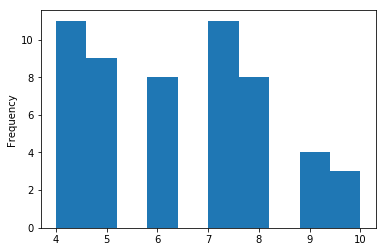

In [101]:
df["Game"].plot.hist() # histogram

Что показывает этот график? Он показывает, сколько студентов получили те или иные оценки. По гистограмме видно, что  больше всего по этому курсу оценок 4 и 7. 

Можно поменять цвет гистограммы:

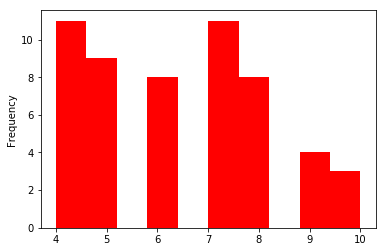

In [103]:
df["Game"].plot.hist(color = "red")

Можно пытаться строить другие графики. Например, построить ящик с усами.

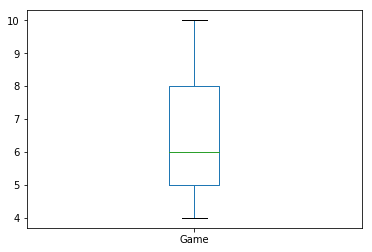

In [104]:
df["Game"].plot.box() # boxplot

Этот график визуализирует основные описательные статистики переменной и отображает форму ее распределения. Нижняя граница яшика ‒ это нижний квартиль, верхняя ‒ верхний квартиль, линяя внутри ящика ‒ медиана. Усы графика могут откладываться по-разному: если в переменной встречаются нетипичные значения (выбросы), то границы усов совпадают с границами типичных значений, если нетипичных значений нет, границы усов соответствуют минимальному и максимальному значению переменной. Подробнее про ящик с усами см. [здесь](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8).